In [1]:
from google.colab import files
uploaded = files.upload()

Saving features.txt to features.txt
Saving subject_test.txt to subject_test.txt
Saving subject_train.txt to subject_train.txt
Saving X_test.txt to X_test.txt
Saving X_train.txt to X_train.txt
Saving y_test.txt to y_test.txt
Saving y_train.txt to y_train.txt


In [2]:
import numpy as np
import pandas as pd

import matplotlib as mlt
import matplotlib.pyplot as plt

import seaborn as sns
import plotly
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from sklearn.manifold import TSNE

In [3]:
features = list()
with open('features.txt') as file:
    features = [line.split()[1] for line in file.readlines()]

In [5]:
X_train = pd.read_csv('X_train.txt', delim_whitespace = True, header = None)
X_train.columns = features
X_train['subject'] = pd.read_csv('subject_train.txt', header = None, squeeze = True)

y_train = pd.read_csv('y_train.txt', names = ['Activity'], squeeze = True)
y_train_labels = y_train.map({1: 'walking', 
                              2:'upstairs',
                              3:'downstairs',
                              4:'sitting', 
                              5:'standing',
                              6:'laying'})

train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels

In [6]:
X_test = pd.read_csv('X_test.txt', delim_whitespace = True, header = None)
X_test.columns = features
X_test['subject'] = pd.read_csv('subject_train.txt', header = None, squeeze = True)

y_test = pd.read_csv('y_test.txt', names = ['Activity'], squeeze = True)
y_test_labels = y_test.map({1: 'walking', 
                              2: 'upstairs',
                              3: 'downstairs',
                              4: 'sitting', 
                              5: 'standing',
                              6: 'laying'})

test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3

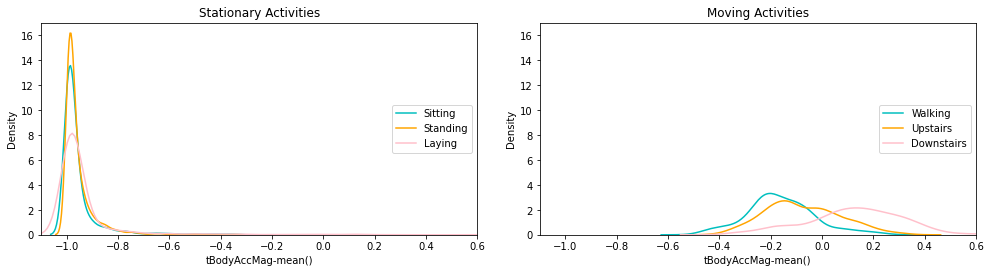

In [8]:
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize = (14, 7))
plt.subplot(2, 2, 1)
plt.title('Stationary Activities')
sns.distplot(df4['tBodyAccMag-mean()'], color = 'c', hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMag-mean()'], color = 'orange', hist = False, label = 'Standing')
sns.distplot(df6['tBodyAccMag-mean()'], color = 'pink', hist = False, label = 'Laying')
plt.axis([-1.1, 0.6, 0, 17])
plt.legend(loc = 'center right')

plt.subplot(2, 2, 2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMag-mean()'], color = 'c', hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMag-mean()'], color = 'orange', hist = False, label = 'Upstairs')
sns.distplot(df3['tBodyAccMag-mean()'], color = 'pink', hist = False, label = 'Downstairs')
plt.axis([-1.1, 0.6, 0, 17])
plt.legend(loc = 'center right')

plt.tight_layout()
plt.show()

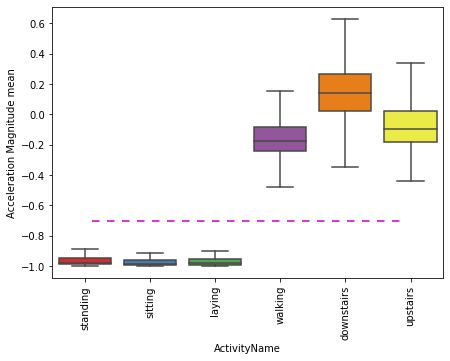

In [9]:
plt.figure(figsize = (7, 5))
sns.boxplot(x = 'ActivityName', y = 'tBodyAccMag-mean()', data = train, showfliers = False, saturation = 1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y = -0.7, xmin = 0.1, xmax = 0.9, dashes = (5, 5), c = 'm')
plt.xticks(rotation = 90)
plt.show()

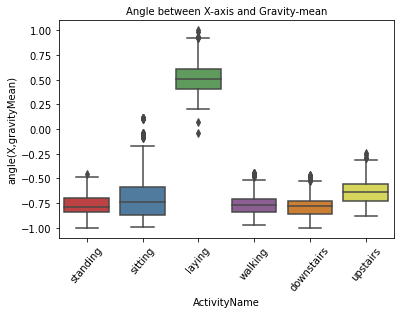

In [17]:
sns.boxplot(x = 'ActivityName', y = 'angle(X,gravityMean)', data = train)
plt.axhline(y = 0.08, xmin = 0.2, xmax = 0.2, c = 'm', dashes = (5, 3))
plt.title('Angle between X-axis and Gravity-mean', fontsize = 10)
plt.xticks(rotation = 50)
plt.show()

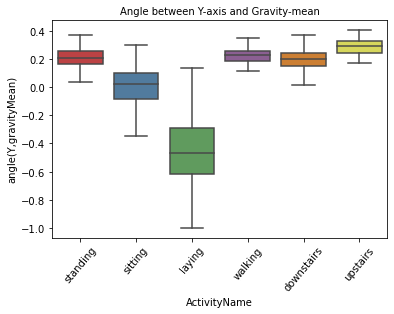

In [18]:
sns.boxplot(x = 'ActivityName', y = 'angle(Y,gravityMean)', data = train, showfliers = False)
plt.title('Angle between Y-axis and Gravity-mean', fontsize = 10)
plt.xticks(rotation = 50)
plt.axhline(y = -0.22, xmin = 0.2, xmax = 0.2, dashes = (5, 3), c = 'm')
plt.show()